# Preprocessing

In [1]:
import pandas as pd
from io import StringIO

# Define the file path
file_path = '/Users/shubhibhadauriya/Desktop/VA_New/unemployement_2021.csv'

# Read the file and preprocess it by skipping initial irrelevant lines
with open(file_path, 'r') as file:
    lines = file.readlines()

# Display the first few lines to identify the header
print("First 10 lines of the file for inspection:")
for line in lines[:10]:
    print(line.strip())

# Find the index of the line containing the header
header_index = 0
for i, line in enumerate(lines):
    if "local authority" in line.lower():  # Example: finding a line with header keywords
        header_index = i
        break

# Create a new file content with only the relevant lines
cleaned_lines = []
for line in lines[header_index:]:
    split_line = line.strip().split(',')
    # Assuming the first column is non-numeric (like region names) and others are numeric
    if len(split_line) > 1 and all(x.replace('.', '', 1).isdigit() or i == 0 for i, x in enumerate(split_line)):
        cleaned_lines.append(line)

# Insert the header line
cleaned_lines.insert(0, lines[header_index])

# Write the cleaned content to a new CSV string
cleaned_content = ''.join(cleaned_lines)

# Read the cleaned content into a pandas DataFrame
data = pd.read_csv(StringIO(cleaned_content))

# Display the first few rows of the cleaned dataframe to verify
print("Cleaned DataFrame:")
print(data.head())
print(data.tail())

# Save the cleaned DataFrame to a new CSV file if needed
# data.to_csv('/path/to/save/cleaned_unemployement_2021.csv', index=False)


First 10 lines of the file for inspection:
local authority: county / unitary (as of April 2023),Economically active (excluding full-time students): Unemployed,Economically active and a full-time student: Unemployed,Economically inactive (excluding full-time students),Economically inactive and a full-time student
Hartlepool,486,15,12547,769
Middlesbrough,875,48,18628,1386
Redcar and Cleveland,615,32,18324,1073
Stockton-on-Tees,823,44,20330,1613
Darlington,463,28,11320,815
County Durham,1829,121,65653,3967
Northumberland,1050,58,34903,2132
Newcastle upon Tyne,1460,99,31285,2729
North Tyneside,673,41,21392,1455
Cleaned DataFrame:
  local authority: county / unitary (as of April 2023)  \
0                                         Hartlepool     
1                                      Middlesbrough     
2                               Redcar and Cleveland     
3                                   Stockton-on-Tees     
4                                         Darlington     

   Economically 

# Projection

## PCA

/var/folders/p6/7s8r37g12jg4n30jfwg636fc0000gn/T/ipykernel_5488/3401045548.py:33: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(


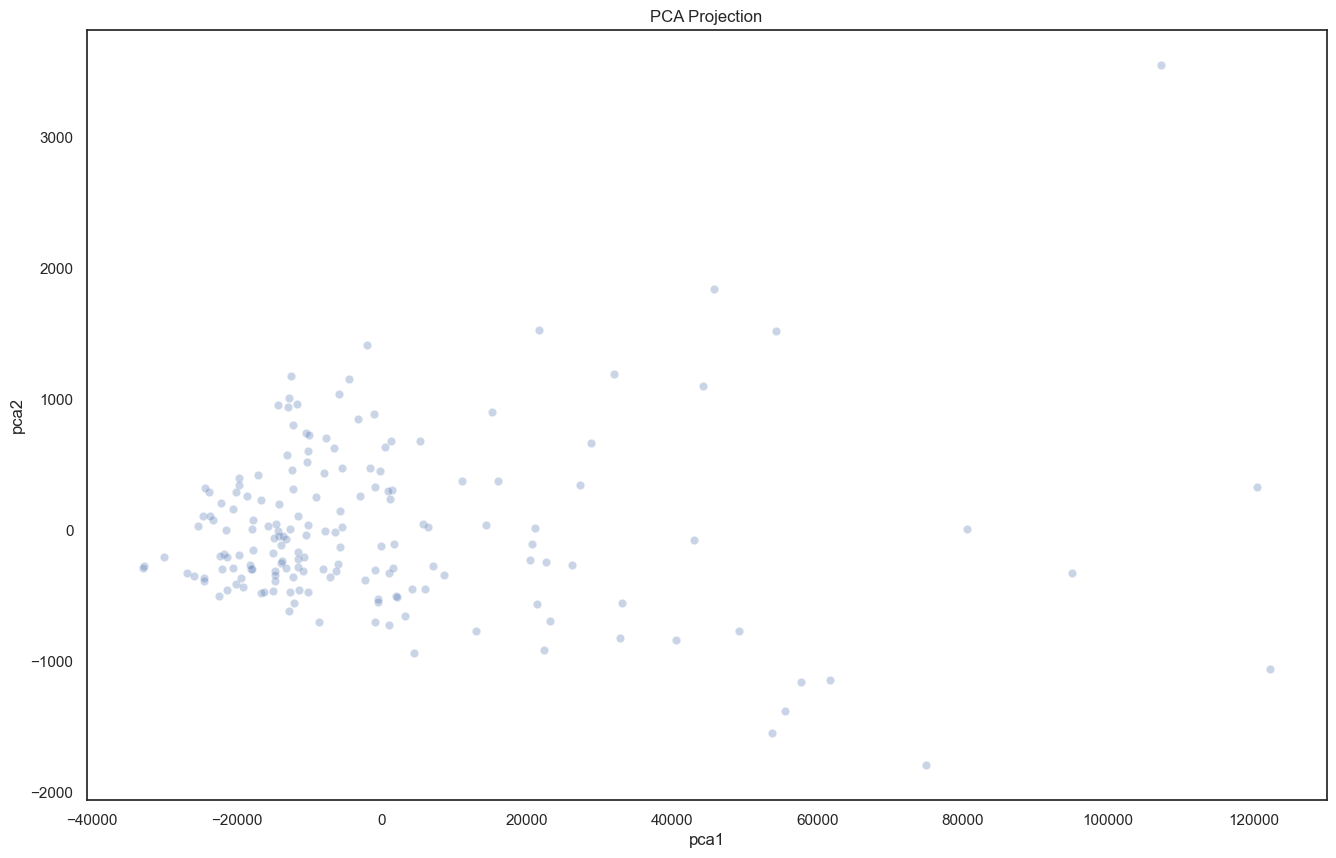

In [2]:
import pandas as pd
from sklearn.decomposition import PCA
import seaborn as sns
import matplotlib.pyplot as plt


# Convert all columns to numeric except the specified one
data_numeric = data.drop(columns=['local authority: county / unitary (as of April 2023)']).apply(pd.to_numeric, errors='coerce')

# Fill any missing values with the mean of the respective column
data_numeric.fillna(data_numeric.mean(), inplace=True)

# Apply PCA
pca = PCA(n_components=2)
pca_results = pca.fit_transform(data_numeric)

# Create a DataFrame with the PCA results
pca_df = pd.DataFrame(pca_results, columns=['pca1', 'pca2'])

# Add the original columns to the DataFrame
pca_df = pd.concat([data, pca_df], axis=1)

# Display the updated DataFrame
#print("DataFrame with PCA results:")

pca_df.head()

# Set up the matplotlib figure
sns.set(style="white", context="notebook", rc={"figure.figsize":(14,10)})

# PCA Plot
plt.figure(figsize=(16,10))
sns.scatterplot(
    x="pca1", y="pca2",
    palette=sns.color_palette("hsv", 10),
    data=pca_df,
    legend="full",
    alpha=0.3
)
plt.title("PCA Projection")
plt.show()

# Save the DataFrame to a new CSV file for Tableau visualization
pca_df.to_csv('/Users/shubhibhadauriya/Desktop/VA_New/unemployement_2021_with_pca.csv', index=False)



## T-sne

DataFrame with t-SNE results:
  local authority: county / unitary (as of April 2023)  \
0                                         Hartlepool     
1                                      Middlesbrough     
2                               Redcar and Cleveland     
3                                   Stockton-on-Tees     
4                                         Darlington     

   Economically active (excluding full-time students): Unemployed  \
0                                                486                
1                                                875                
2                                                615                
3                                                823                
4                                                463                

   Economically active and a full-time student: Unemployed  \
0                                                 15         
1                                                 48         
2                   

/var/folders/p6/7s8r37g12jg4n30jfwg636fc0000gn/T/ipykernel_5488/2104656955.py:25: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(


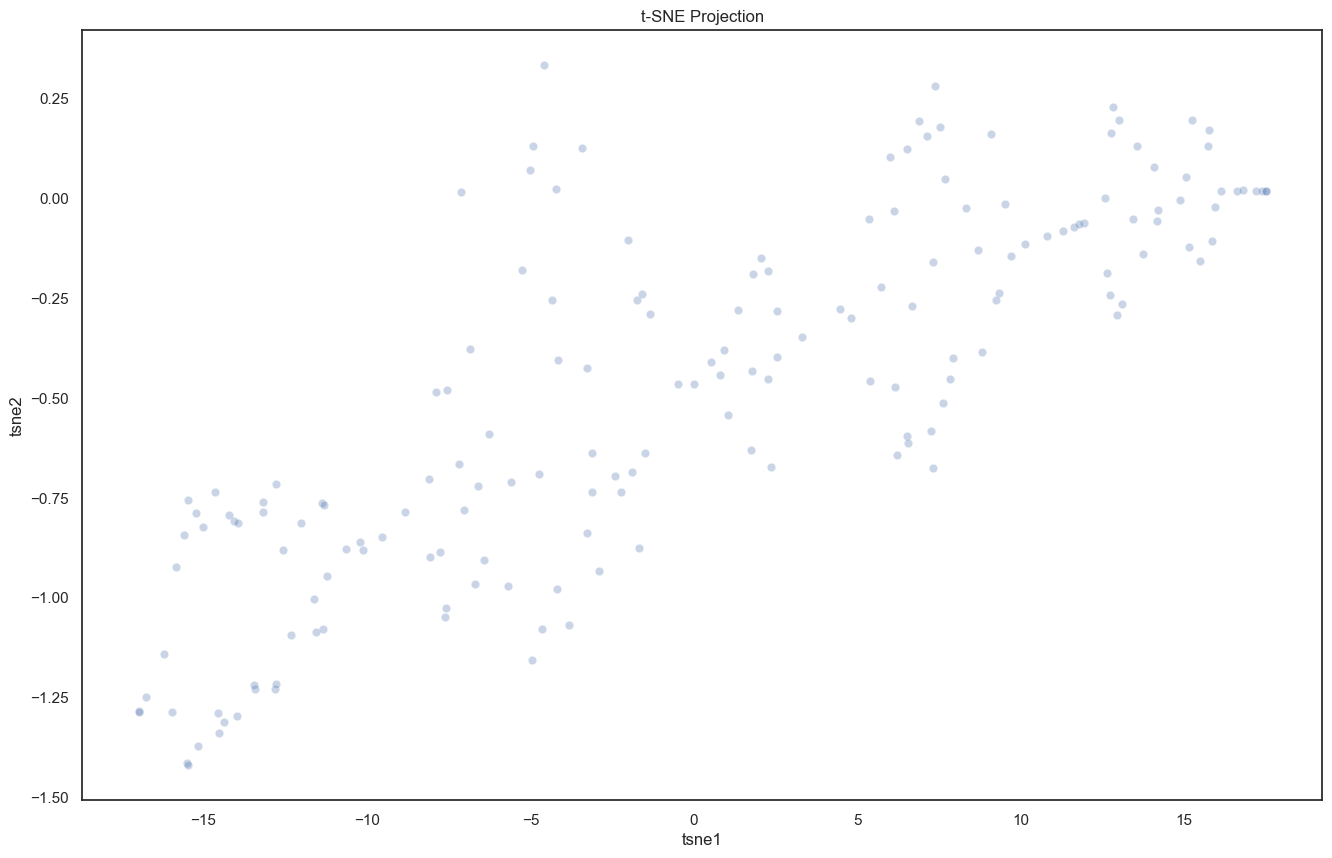

In [3]:
import pandas as pd
from sklearn.manifold import TSNE
import seaborn as sns
import matplotlib.pyplot as plt

# Apply t-SNE
tsne = TSNE(n_components=2, random_state=42)
tsne_results = tsne.fit_transform(data_numeric)

# Create a DataFrame with the t-SNE results
tsne_df = pd.DataFrame(tsne_results, columns=['tsne1', 'tsne2'])

# Add the original columns to the DataFrame
tsne_df = pd.concat([data, tsne_df], axis=1)

# Display the updated DataFrame
print("DataFrame with t-SNE results:")
print(tsne_df.head())

# Set up the matplotlib figure
sns.set(style="white", context="notebook", rc={"figure.figsize":(14,10)})

# t-SNE Plot
plt.figure(figsize=(16,10))
sns.scatterplot(
    x="tsne1", y="tsne2",
    palette=sns.color_palette("hsv", 10),
    data=tsne_df,
    legend="full",
    alpha=0.3
)
plt.title("t-SNE Projection")
plt.show()

# Save the DataFrame to a new CSV file for Tableau visualization
tsne_df.to_csv('/Users/shubhibhadauriya/Desktop/VA_New/unemployement_2021_with_tsne.csv', index=False)


## Umap

In [4]:
!pip install umap-learn

/Users/shubhibhadauriya/anaconda3/lib/python3.10/site-packages/umap/umap_.py:1943: UserWarning: n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


DataFrame with UMAP results:
  local authority: county / unitary (as of April 2023)  \
0                                         Hartlepool     
1                                      Middlesbrough     
2                               Redcar and Cleveland     
3                                   Stockton-on-Tees     
4                                         Darlington     

   Economically active (excluding full-time students): Unemployed  \
0                                                486                
1                                                875                
2                                                615                
3                                                823                
4                                                463                

   Economically active and a full-time student: Unemployed  \
0                                                 15         
1                                                 48         
2                    

/var/folders/p6/7s8r37g12jg4n30jfwg636fc0000gn/T/ipykernel_5488/2712454953.py:23: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(


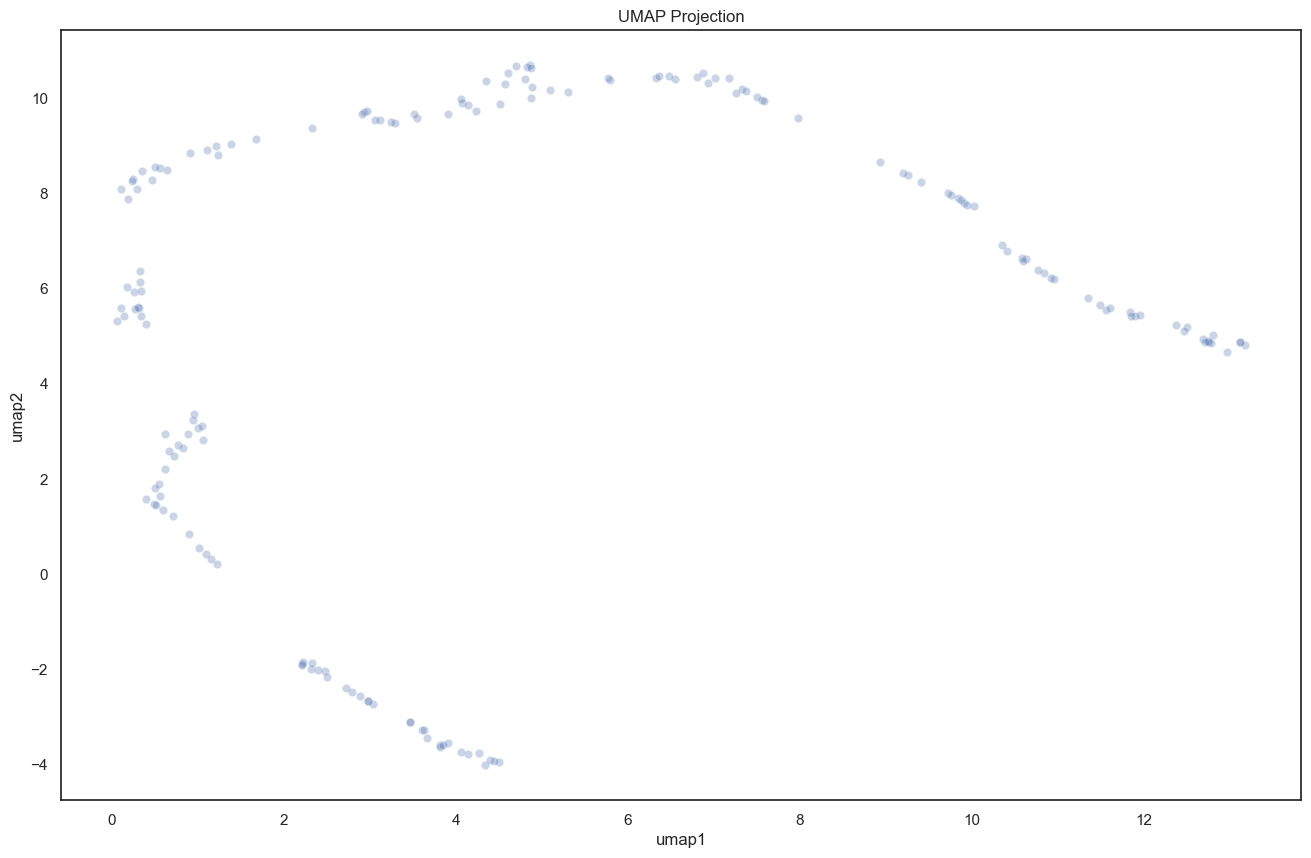

In [5]:
import umap 


# Apply UMAP
umap_reducer = umap.UMAP(n_components=2, random_state=42)
umap_results = umap_reducer.fit_transform(data_numeric)

# Create a DataFrame with the UMAP results
umap_df = pd.DataFrame(umap_results, columns=['umap1', 'umap2'])

# Add the original columns to the DataFrame
umap_df = pd.concat([data, umap_df], axis=1)

# Display the updated DataFrame
print("DataFrame with UMAP results:")
print(umap_df.head())

# Set up the matplotlib figure
sns.set(style="white", context="notebook", rc={"figure.figsize":(14,10)})

# UMAP Plot
plt.figure(figsize=(16,10))
sns.scatterplot(
    x="umap1", y="umap2",
    palette=sns.color_palette("hsv", 10),
    data=umap_df,
    legend="full",
    alpha=0.3
)
plt.title("UMAP Projection")
plt.show()

# Save the DataFrame to a new CSV file for Tableau visualization
umap_df.to_csv('/Users/shubhibhadauriya/Desktop/VA_New/unemployement_2021_with_umap.csv', index=False)


## T-sne is best for this dataset.